In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [29]:
DFproject = pd.read_csv('resultphyschem.csv')
show(DFproject)

In [30]:
show(DFproject['CharacteristicName'].value_counts())

- Each sample is tested for only one specific chemical
- Most samples are taken from the Gulf of Mexico
- Analyzing the three most tested chemicals in the dataset. Based on these concentrations, trying to dive deeper and think about how this affects marine life, and how this may impact humans like through bioaccumulation and recreational activities.
- Should we do three separate analysis for each chemical, or go in depth with just one?

- Organic carbon: Most samples tested for organic carbon. Compare ppm concentration across the Gulf of Mexico. High carbon levels can lead to ocean acidification. Based on this, see if it correlates with fish/animal populations, especially shellfish. Try to find pH data to see if the data agrees, if carbon ppm is low but pH is acidic, then maybe something else is causing the acidification.
- 2,3,3',4,5'-Pentachlorobiphenyl: Samples of pentachlorobiphenyl were taken around San Diego/Mexico. It is a manmade chemical used as an oil additive and in building materials. So we could find something like fishing or recreational data to show the frequency of human activity in/near these sample sites. Or the abundance of wildlife in/near these sample sites. 
- Phosphated pesticides: These samples were collected along the coast in Massachusetts. Phosphorus can lead to algae blooms, so we could find algae data and compare it to the sites in Massachusetts. We could compare marine life population with other nearby sites, or see if this has an impact on fishing activity

In [32]:
maskphos = (DFproject['CharacteristicName'] == 'Phosphated pesticides')
DFphos = DFproject[maskphos]
show(DFphos)

In [33]:
show(DFphos['MonitoringLocationName'].value_counts())

In [34]:
DFpH = pd.read_csv('pH.csv')
show(DFpH)

/var/folders/3p/1bz4xmy96wj0vhl_qhqj52t80000gp/T/ipykernel_53555/3422650483.py:1: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



In [35]:
DFcysts = pd.read_csv('cysts.csv')
show(DFcysts)

In [87]:
DFcysts.shape
# There are 185 observations, meaning 185 samples were taken 

(185, 9)

In [56]:
DFcysts.groupby(by=['CRUISE']).count()
# 48 samples were taken for cruise HLY1801 (Healy1801). 
# 26 samples were taken for cruise HLY1803 (Healy1803).
# 56 samples were taken for cruise HLY1901 (Healy1901).
# 17 samples were taken for cruise NBS2019 (North Bering Sea 2019).
# 38 samples were taken for cruise OS19-01 (Arctic Integrated Ecosystem Survey 2019).

,STATION_ID,LAYER_CM,DATE,LAT,LON,ALEXANDRIUM_CYSTS_CC,PDALEI_CYSTS_CC,SCRIPPS_CYSTS_CC
CRUISE,,,,,,,,
HLY1801,48,48,48,48,48,48,20,20
HLY1803,26,26,26,26,26,26,25,25
HLY1901,56,56,56,56,56,56,0,0
NBS2019,17,17,17,17,17,17,0,0
OS19-01,38,38,38,38,38,38,0,0


In [89]:
DFcysts['ALEXANDRIUM_CYSTS_CC'].describe()
# The minimum observed concentration of the alexandrium species was 0. The maximum observed concentration was 17602 cysts per cubic cm.
# All 185 samples were tested for the alexandrium species

count      185.000000
mean       886.248649
std       2311.572506
min          0.000000
25%         36.000000
50%        209.000000
75%        621.000000
max      17602.000000
Name: ALEXANDRIUM_CYSTS_CC, dtype: float64

In [91]:
DFcysts['SCRIPPS_CYSTS_CC'].describe()
# The minimum observed concentration of the scripps species was 0. The maximum observed concentration was 408 cysts per cubic cm.
# Only 45 samples were tested for the scripps species

count     45.000000
mean      53.444444
std       90.669368
min        0.000000
25%        5.000000
50%       11.000000
75%       68.000000
max      408.000000
Name: SCRIPPS_CYSTS_CC, dtype: float64

In [93]:
DFcysts['PDALEI_CYSTS_CC'].describe()
# The minimum observed concentration of the pdalei species was 5 cc. The maximum observed concentration was 3283 cysts per cubic cm.
# Only 45 samples were tested for the pdalei species

count      45.000000
mean      261.111111
std       512.665061
min         5.000000
25%        34.000000
50%       110.000000
75%       333.000000
max      3283.000000
Name: PDALEI_CYSTS_CC, dtype: float64

In [97]:
show(DFcysts['CRUISE'].value_counts())

In [107]:
maskHLY1901 = (DFcysts['CRUISE']=='HLY1901')
show(DFcysts[maskHLY1901])
# On the HLY1901 cruise, no samples were tested for Pdalei or Scripps

In [120]:
maskHLY1801 = (DFcysts['CRUISE']=='HLY1801')
show(DFcysts[maskHLY1801])
# On the HLY1801 cruise, some samples were tested for Pdalei or Scripps

In [112]:
maskOS19 = (DFcysts['CRUISE']=='OS19-01')
show(DFcysts[maskOS19])
# On the OS19-01 cruise, no samples were tested for Pdalei or Scripps

In [114]:
maskHLY1803 = (DFcysts['CRUISE']=='HLY1803')
show(DFcysts[maskHLY1803])
# On the HLY1803 cruise, most samples were tested for Pdalei or Scripps

In [118]:
maskNBS2019 = (DFcysts['CRUISE']=='NBS2019')
show(DFcysts[maskNBS2019])
# On the NBS2019 cruise, no samples were tested for Pdalei or Scripps

In [124]:
# On the HLY1801 and HLY1803 cruises, Pdalei and Scripps were tested. On all other cruises, these species were not tested, only Alexandrium
# Do one analysis only for Alexandrium
# Do another analysis that drops all the NaNs, so we only have observations that tested for all three species

In [131]:
columnsAlex = ['LAT','LON','ALEXANDRIUM_CYSTS_CC']
DFAlex = DFcysts[columnsAlex]
show(DFAlex)

In [145]:
DFAlex['ALEXANDRIUM_CYSTS_CC'].describe()

count      185.000000
mean       886.248649
std       2311.572506
min          0.000000
25%         36.000000
50%        209.000000
75%        621.000000
max      17602.000000
Name: ALEXANDRIUM_CYSTS_CC, dtype: float64

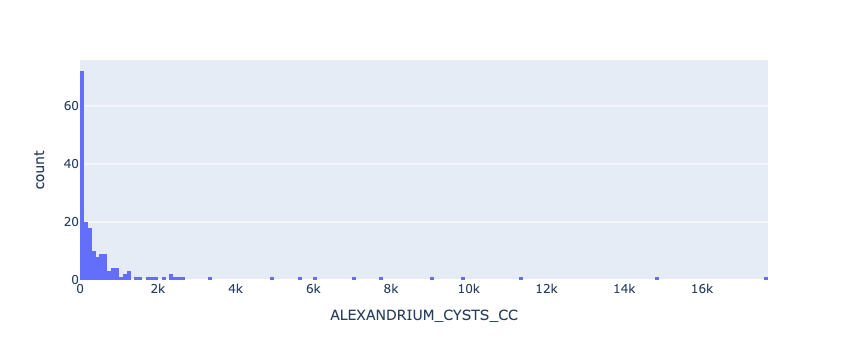

In [181]:
fig = px.histogram(DFAlex,
                x = 'ALEXANDRIUM_CYSTS_CC',
                  nbins = 200)
fig.show()